In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.cluster import KMeans

In [2]:
combustiveis_2001_2012 = pandas.read_csv('combustivel-brasil-2001-2012.csv')

In [3]:
combustiveis_2001_2012

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,Jul/01,ETANOL HIDRATADO,17899,R$/l,1.009,0.165,0.639,1.580,0.193,0.163,0.816,0.156,0.318,1.578,0.192
1,Aug/01,ETANOL HIDRATADO,28796,R$/l,1.014,0.173,0.649,1.650,0.208,0.171,0.806,0.155,0.400,1.342,0.193
2,Sep/01,ETANOL HIDRATADO,32994,R$/l,1.027,0.173,0.630,1.790,0.218,0.168,0.809,0.157,0.380,1.421,0.194
3,Oct/01,ETANOL HIDRATADO,42036,R$/l,1.039,0.166,0.650,1.880,0.224,0.160,0.816,0.150,0.400,1.337,0.184
4,Nov/01,ETANOL HIDRATADO,34592,R$/l,1.033,0.167,0.670,1.880,0.217,0.162,0.815,0.149,0.410,1.287,0.183
5,Dec/01,ETANOL HIDRATADO,38506,R$/l,1.029,0.166,0.670,1.880,0.213,0.161,0.816,0.147,0.400,1.338,0.181
6,Jan/02,ETANOL HIDRATADO,41454,R$/l,1.019,0.164,0.600,1.880,0.206,0.161,0.813,0.142,0.410,1.338,0.175
7,Feb/02,ETANOL HIDRATADO,36490,R$/l,1.010,0.162,0.679,1.880,0.201,0.160,0.809,0.142,0.410,1.300,0.176
8,Mar/02,ETANOL HIDRATADO,36486,R$/l,1.010,0.162,0.659,1.700,0.205,0.160,0.805,0.145,0.410,1.310,0.180
9,Apr/02,ETANOL HIDRATADO,45003,R$/l,1.010,0.158,0.659,1.700,0.208,0.157,0.801,0.142,0.320,1.310,0.177


In [4]:
combustiveis_2013_2021 = pandas.read_csv('combustivel-brasil-2013-2021.csv')

In [5]:
combustiveis_2013_2021.rename(columns = {"PREÇO MÉDIO REVENDA": "PRECO MÉDIO REVENDA"},
                                              inplace = True)

In [6]:
combustiveis_2013_2021

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,Jan/13,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.230,0.053,1.926,0.080,1.398,2.570,0.042
1,Jan/13,OLEO DIESEL S10,4741,R$/l,2.235,0.108,1.990,2.950,0.245,0.048,1.990,0.073,1.800,2.470,0.037
2,Jan/13,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.266,0.125,1.690,0.222,1.220,2.475,0.131
3,Jan/13,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.386,0.054,2.377,0.109,2.080,2.895,0.046
4,Jan/13,GLP,39597,R$/13kg,40.164,3.964,26.000,62.000,10.310,0.099,29.854,4.462,15.000,45.000,0.149
5,Jan/13,GNV,2401,R$/m3,1.764,0.171,1.379,2.599,0.407,0.097,1.357,0.154,0.835,1.913,0.113
6,Feb/13,OLEO DIESEL,26614,R$/l,2.252,0.114,1.949,2.980,0.263,0.051,1.989,0.086,1.475,2.570,0.043
7,Feb/13,OLEO DIESEL S10,6671,R$/l,2.330,0.116,2.059,3.050,0.267,0.050,2.063,0.086,1.796,2.554,0.042
8,Feb/13,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.267,0.120,1.733,0.217,1.300,2.601,0.125
9,Feb/13,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.424,0.051,2.463,0.106,2.095,2.965,0.043


In [7]:
combustiveis_2001_2021 = pandas.concat([combustiveis_2001_2012, combustiveis_2013_2021], sort=False)

In [8]:
combustiveis_2001_2021

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
0,Jul/01,ETANOL HIDRATADO,17899,R$/l,1.009,0.165,0.639,1.580,0.193,0.163,0.816,0.156,0.318,1.578,0.192,NaN,NaN,NaN,NaN,NaN
1,Aug/01,ETANOL HIDRATADO,28796,R$/l,1.014,0.173,0.649,1.650,0.208,0.171,0.806,0.155,0.400,1.342,0.193,NaN,NaN,NaN,NaN,NaN
2,Sep/01,ETANOL HIDRATADO,32994,R$/l,1.027,0.173,0.630,1.790,0.218,0.168,0.809,0.157,0.380,1.421,0.194,NaN,NaN,NaN,NaN,NaN
3,Oct/01,ETANOL HIDRATADO,42036,R$/l,1.039,0.166,0.650,1.880,0.224,0.160,0.816,0.15,0.400,1.337,0.184,NaN,NaN,NaN,NaN,NaN
4,Nov/01,ETANOL HIDRATADO,34592,R$/l,1.033,0.167,0.670,1.880,0.217,0.162,0.815,0.149,0.410,1.287,0.183,NaN,NaN,NaN,NaN,NaN
5,Dec/01,ETANOL HIDRATADO,38506,R$/l,1.029,0.166,0.670,1.880,0.213,0.161,0.816,0.147,0.400,1.338,0.181,NaN,NaN,NaN,NaN,NaN
6,Jan/02,ETANOL HIDRATADO,41454,R$/l,1.019,0.164,0.600,1.880,0.206,0.161,0.813,0.142,0.410,1.338,0.175,NaN,NaN,NaN,NaN,NaN
7,Feb/02,ETANOL HIDRATADO,36490,R$/l,1.010,0.162,0.679,1.880,0.201,0.160,0.809,0.142,0.410,1.300,0.176,NaN,NaN,NaN,NaN,NaN
8,Mar/02,ETANOL HIDRATADO,36486,R$/l,1.010,0.162,0.659,1.700,0.205,0.160,0.805,0.145,0.410,1.310,0.18,NaN,NaN,NaN,NaN,NaN
9,Apr/02,ETANOL HIDRATADO,45003,R$/l,1.010,0.158,0.659,1.700,0.208,0.157,0.801,0.142,0.320,1.310,0.177,NaN,NaN,NaN,NaN,NaN


In [9]:
filtro_gasolina = combustiveis_2001_2021["PRODUTO"]=="GASOLINA COMUM"

In [10]:
combustiveis_2001_2021 = combustiveis_2001_2021[filtro_gasolina]

In [11]:
preco_gasolina_2001_2021 = combustiveis_2001_2021[["MÊS", "PRECO MÉDIO REVENDA"]]

In [12]:
preco_gasolina_2001_2021.reset_index(drop=True, inplace=True)

In [13]:
preco_gasolina_2001_2021

,MÊS,PRECO MÉDIO REVENDA
0,Jul/01,1.681
1,Aug/01,1.711
2,Sep/01,1.718
3,Oct/01,1.779
4,Nov/01,1.780
5,Dec/01,1.775
6,Jan/02,1.588
7,Feb/02,1.509
8,Mar/02,1.574
9,Apr/02,1.713


In [14]:
petroleo_brent_2001_2021 = pandas.read_csv('petroleo-brent-2001-2021.csv')

In [15]:
petroleo_brent_2001_2021 = petroleo_brent_2001_2021.iloc[::-1]

In [16]:
petroleo_brent_2001_2021.reset_index(drop=True, inplace=True)

In [17]:
petroleo_brent_2001_2021 = petroleo_brent_2001_2021[["Data", "Último"]]

In [18]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,"24,69"
1,Ago 01,"26,41"
2,Set 01,"23,26"
3,Out 01,"20,37"
4,Nov 01,"19,14"
5,Dez 01,"19,90"
6,Jan 02,"19,18"
7,Fev 02,"21,33"
8,Mar 02,"25,92"
9,Abr 02,"26,47"


In [19]:
petroleo_brent_2001_2021 = petroleo_brent_2001_2021[:-1]  

In [20]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,"24,69"
1,Ago 01,"26,41"
2,Set 01,"23,26"
3,Out 01,"20,37"
4,Nov 01,"19,14"
5,Dez 01,"19,90"
6,Jan 02,"19,18"
7,Fev 02,"21,33"
8,Mar 02,"25,92"
9,Abr 02,"26,47"


In [21]:
petroleo_brent_2001_2021["Último"] = petroleo_brent_2001_2021["Último"].str.replace(',','.')

/home/guilherme/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
petroleo_brent_2001_2021["Último"] = pandas.to_numeric(petroleo_brent_2001_2021["Último"], downcast="float")


/home/guilherme/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,24.690001
1,Ago 01,26.410000
2,Set 01,23.260000
3,Out 01,20.370001
4,Nov 01,19.139999
5,Dez 01,19.900000
6,Jan 02,19.180000
7,Fev 02,21.330000
8,Mar 02,25.920000
9,Abr 02,26.469999


In [24]:
usd_brl_2001_2021 = pandas.read_csv('usd-brl-2001-2021.csv')

In [25]:
usd_brl_2001_2021

,Data,Último,Abertura,Máxima,Mínima,Var%
0,Nov 21,"5,5669","5,6240","5,6982","5,3889","-1,25%"
1,Out 21,"5,6372","5,4432","5,7547","5,3527","3,57%"
2,Set 21,"5,4428","5,1694","5,4767","5,1310","5,70%"
3,Ago 21,"5,1492","5,2158","5,4757","5,1101","-1,21%"
4,Jul 21,"5,2123","4,9705","5,3145","4,9467","4,90%"
5,Jun 21,"4,9686","5,2210","5,2212","4,8929","-4,77%"
6,Mai 21,"5,2172","5,4360","5,4843","5,1964","-4,04%"
7,Abr 21,"5,4366","5,6330","5,7562","5,3274","-3,46%"
8,Mar 21,"5,6315","5,5870","5,8787","5,4482","0,59%"
9,Fev 21,"5,5986","5,4663","5,6093","5,3042","2,49%"


In [26]:
usd_brl_2001_2021 = usd_brl_2001_2021.iloc[::-1]

In [27]:
usd_brl_2001_2021 = usd_brl_2001_2021.iloc[2:]

In [28]:
usd_brl_2001_2021

,Data,Último,Abertura,Máxima,Mínima,Var%
244,Jul 01,"2,4730","2,3180","2,6080","2,3090","7,03%"
243,Ago 01,"2,5640","2,4790","2,5830","2,4380","3,68%"
242,Set 01,"2,6700","2,5653","2,8400","2,5480","4,13%"
241,Out 01,"2,6960","2,6940","2,8070","2,6590","0,97%"
240,Nov 01,"2,4950","2,6720","2,6720","2,4480","-7,46%"
239,Dez 01,"2,3110","2,4940","2,4960","2,2740","-7,37%"
238,Jan 02,"2,4130","2,3110","2,4700","2,2770","4,41%"
237,Fev 02,"2,3650","2,4120","2,4930","2,3360","-1,99%"
236,Mar 02,"2,3250","2,3640","2,3860","2,3140","-1,69%"
235,Abr 02,"2,3610","2,3260","2,3770","2,2520","1,55%"


In [29]:
usd_brl_2001_2021 = usd_brl_2001_2021.iloc[:-1]

In [30]:
usd_brl_2001_2021 = usd_brl_2001_2021[["Data", "Último"]]

In [31]:
usd_brl_2001_2021

,Data,Último
244,Jul 01,"2,4730"
243,Ago 01,"2,5640"
242,Set 01,"2,6700"
241,Out 01,"2,6960"
240,Nov 01,"2,4950"
239,Dez 01,"2,3110"
238,Jan 02,"2,4130"
237,Fev 02,"2,3650"
236,Mar 02,"2,3250"
235,Abr 02,"2,3610"


In [32]:
usd_brl_2001_2021.reset_index(drop=True, inplace=True)

In [ ]:
usd_brl_2001_2021

In [33]:
usd_brl_2001_2021["Último"] = usd_brl_2001_2021["Último"].str.replace(',','.')

In [34]:
usd_brl_2001_2021["Último"] = pandas.to_numeric(usd_brl_2001_2021["Último"], downcast="float")

In [35]:
usd_brl_2001_2021

,Data,Último
0,Jul 01,2.4730
1,Ago 01,2.5640
2,Set 01,2.6700
3,Out 01,2.6960
4,Nov 01,2.4950
5,Dez 01,2.3110
6,Jan 02,2.4130
7,Fev 02,2.3650
8,Mar 02,2.3250
9,Abr 02,2.3610


In [ ]:
preco_gasolina_2001_2021

In [36]:
preco_gasolina_2001_2021["Valor USD"] = preco_gasolina_2001_2021["PRECO MÉDIO REVENDA"].astype(float) * usd_brl_2001_2021["Último"].astype(float)

/home/guilherme/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
preco_gasolina_2001_2021

,MÊS,PRECO MÉDIO REVENDA,Valor USD
0,Jul/01,1.681,4.157113
1,Aug/01,1.711,4.387004
2,Sep/01,1.718,4.587060
3,Oct/01,1.779,4.796184
4,Nov/01,1.780,4.441100
5,Dec/01,1.775,4.102025
6,Jan/02,1.588,3.831844
7,Feb/02,1.509,3.568785
8,Mar/02,1.574,3.659550
9,Apr/02,1.713,4.044393


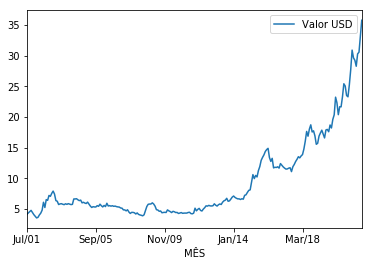

In [38]:
preco_gasolina_2001_2021.plot("MÊS", "Valor USD")

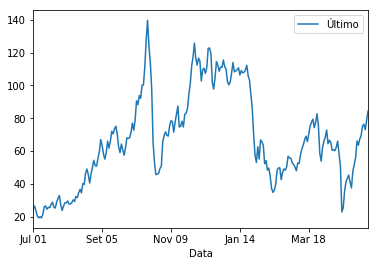

In [39]:
petroleo_brent_2001_2021.plot("Data", "Último")

In [40]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,24.690001
1,Ago 01,26.410000
2,Set 01,23.260000
3,Out 01,20.370001
4,Nov 01,19.139999
5,Dez 01,19.900000
6,Jan 02,19.180000
7,Fev 02,21.330000
8,Mar 02,25.920000
9,Abr 02,26.469999


In [ ]:
preco_gasolina_2001_2021.head()

In [41]:
preco_gasolina_2001_2021["ANO"] = preco_gasolina_2001_2021["MÊS"].str.replace('^\w+/', '20', regex=True)
preco_gasolina_2001_2021.head()

/home/guilherme/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MÊS,PRECO MÉDIO REVENDA,Valor USD,ANO
0,Jul/01,1.681,4.157113,2001
1,Aug/01,1.711,4.387004,2001
2,Sep/01,1.718,4.587060,2001
3,Oct/01,1.779,4.796184,2001
4,Nov/01,1.780,4.441100,2001


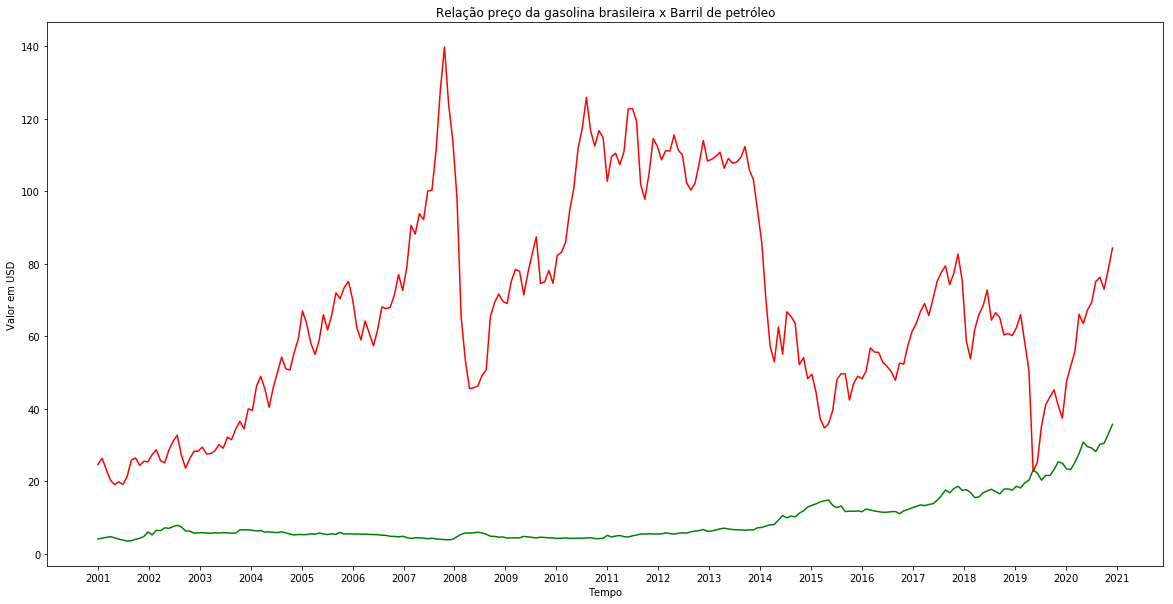

In [42]:
width = 20
height = 10
width_height = (width, height)
plt.figure(figsize=width_height)

plt.plot(preco_gasolina_2001_2021["MÊS"], preco_gasolina_2001_2021["Valor USD"],  color='g', label='Gasolina')
plt.plot(preco_gasolina_2001_2021["MÊS"], petroleo_brent_2001_2021["Último"], color='r', label='Petróleo')


plt.xticks(np.linspace(0, 244, 21), labels=preco_gasolina_2001_2021.loc[::12, "ANO"])


plt.xlabel("Tempo")
plt.ylabel("Valor em USD")
plt.title("Relação preço da gasolina brasileira x Barril de petróleo")

plt.show()

In [43]:
serie_historica_completa = pandas.DataFrame(data={"Petroleo": petroleo_brent_2001_2021["Último"], 
                                          "Gasolina": preco_gasolina_2001_2021["Valor USD"]})
kmeans = KMeans(n_clusters=2).fit(serie_historica_completa)
centroids = kmeans.cluster_centers_


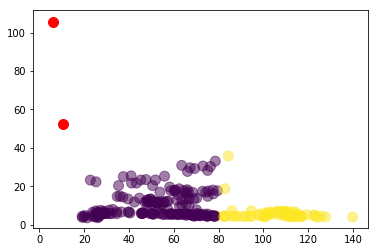

In [44]:

plt.scatter(serie_historica_completa['Petroleo'], serie_historica_completa['Gasolina'],
            c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.show()

In [45]:
preco_gasolina_2001_2021.head()

,MÊS,PRECO MÉDIO REVENDA,Valor USD,ANO
0,Jul/01,1.681,4.157113,2001
1,Aug/01,1.711,4.387004,2001
2,Sep/01,1.718,4.587060,2001
3,Oct/01,1.779,4.796184,2001
4,Nov/01,1.780,4.441100,2001


In [46]:
preco_gasolina_antes_ppi = preco_gasolina_2001_2021.iloc[:-61]
preco_gasolina_antes_ppi.reset_index(drop=True, inplace=True)

barril_petroleo_antes_ppi = petroleo_brent_2001_2021.iloc[:-61]
barril_petroleo_antes_ppi.reset_index(drop=True, inplace=True)


In [ ]:
preco_gasolina_antes_ppi

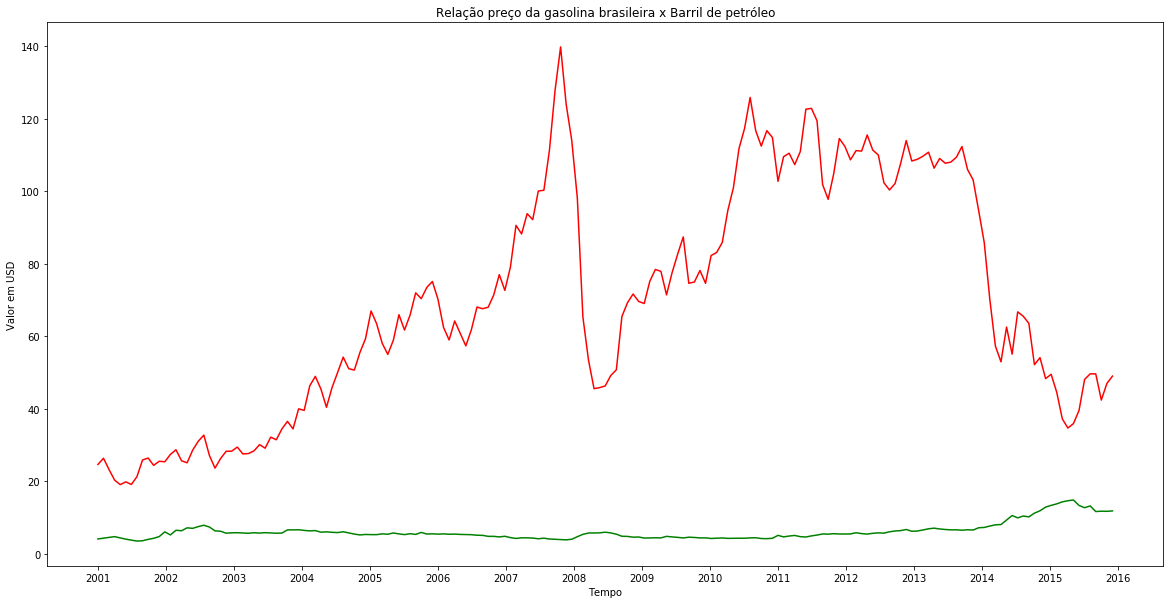

In [48]:
width = 20
height = 10
width_height = (width, height)
plt.figure(figsize=width_height)

plt.plot(preco_gasolina_antes_ppi["MÊS"], preco_gasolina_antes_ppi["Valor USD"],  color='g', label='Gasolina')
plt.plot(preco_gasolina_antes_ppi["MÊS"], barril_petroleo_antes_ppi["Último"], color='r', label='Petróleo')


plt.xticks(np.linspace(0, 183, 16), labels=preco_gasolina_antes_ppi.loc[::12, "ANO"])


plt.xlabel("Tempo")
plt.ylabel("Valor em USD")
plt.title("Relação preço da gasolina brasileira x Barril de petróleo")

plt.show()

In [49]:
serie_historica_antes_ppi = pandas.DataFrame(data={"Petroleo": barril_petroleo_antes_ppi["Último"], 
                                          "Gasolina": preco_gasolina_antes_ppi["Valor USD"]})
kmeans = KMeans(n_clusters=2).fit(serie_historica_antes_ppi)
centroids = kmeans.cluster_centers_


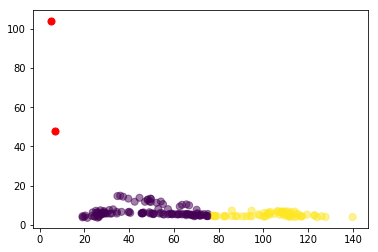

In [50]:

plt.scatter(serie_historica_antes_ppi['Petroleo'], serie_historica_antes_ppi['Gasolina'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [51]:
preco_gasolina_depois_ppi = preco_gasolina_2001_2021.iloc[183:]
preco_gasolina_depois_ppi.reset_index(drop=True, inplace=True)

barril_petroleo_depois_ppi = petroleo_brent_2001_2021.iloc[183:]
barril_petroleo_depois_ppi.reset_index(drop=True, inplace=True)


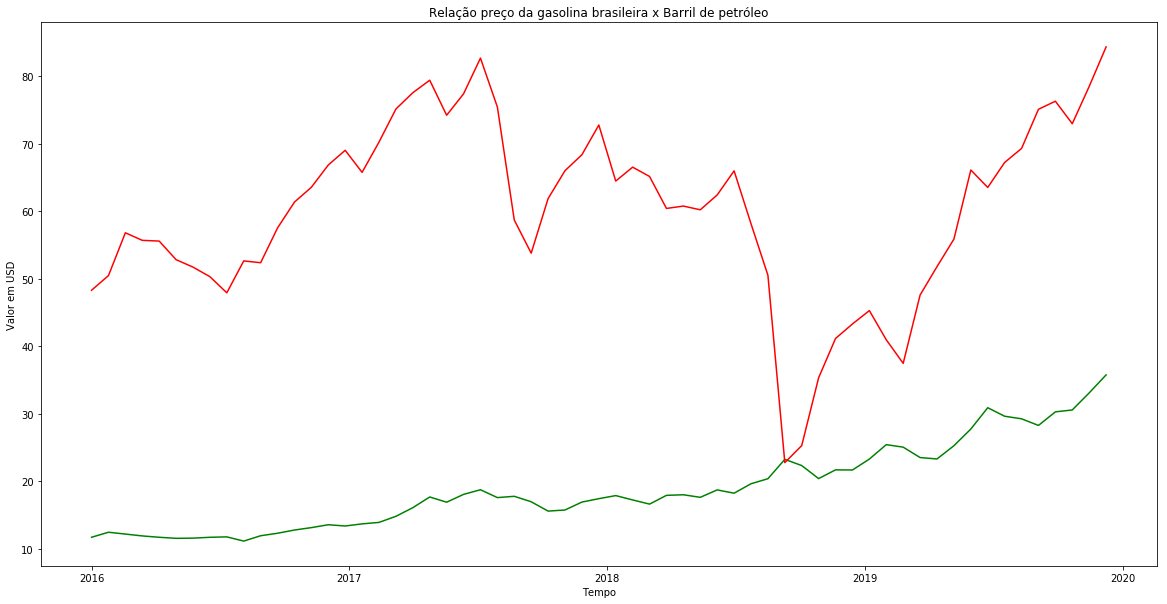

In [52]:
width = 20
height = 10
width_height = (width, height)
plt.figure(figsize=width_height)

plt.plot(preco_gasolina_depois_ppi["MÊS"], preco_gasolina_depois_ppi["Valor USD"],  color='g', label='Gasolina')
plt.plot(preco_gasolina_depois_ppi["MÊS"], barril_petroleo_depois_ppi["Último"], color='r', label='Petróleo')


plt.xticks(np.linspace(0, 61, 5), labels=preco_gasolina_depois_ppi.loc[::12, "ANO"])


plt.xlabel("Tempo")
plt.ylabel("Valor em USD")
plt.title("Relação preço da gasolina brasileira x Barril de petróleo")

plt.show()

In [53]:
serie_historica_depois_ppi = pandas.DataFrame(data={"Petroleo": barril_petroleo_depois_ppi["Último"], 
                                          "Gasolina": preco_gasolina_depois_ppi["Valor USD"]})
kmeans = KMeans(n_clusters=2).fit(serie_historica_depois_ppi)
centroids = kmeans.cluster_centers_


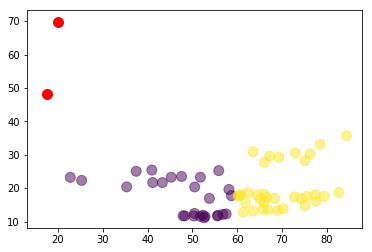

In [54]:
plt.scatter(serie_historica_depois_ppi['Petroleo'], serie_historica_depois_ppi['Gasolina'],
            c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.show()